In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.patches as patches
import matplotlib.colors
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import xarray as xr

In [9]:
data_dir =  '/Volumes/My Passport for Mac/cnn/data_update/with_precip/testing_data/'

In [10]:
reference = 'mpc'
score = 'bs'
season = 'JAS'

In [11]:
forecast = 'logit' #'logit', 'logit_base' 'dim', 'dim_base', 'cnn', 'hybrid', 'hres', 'ecmwf', 'ecmwf_pp', 'emos'

In [12]:
if forecast in ['logit_base', 'dim_base']:
    feature_set = 'v1+time' #'v1+time'
else:
    feature_set = 'v2+time'

In [14]:
model_ref = np.zeros((19, 61))
model_fct = np.zeros((19, 61))
for fold in range(9):
    score_map = xr.open_dataset(data_dir + reference + '_'+score+'_' + season + '_' + str(fold) + '.nc')
    model_ref = model_ref +score_map['var'].values
    if forecast in ['logit', 'logit_base', 'dim', 'dim_base', 'cnn', 'hybrid']:
        score_map2 = xr.open_dataset(data_dir + forecast + '_'+score+ '_' + season + '_' + str(fold) +'.nc')
        #score_map2 = xr.open_dataset(data_dir + forecast + '_' + score + '_' + str(feature_set) +  '_' + season + '_' + str(fold) +'.nc')
    else:
        score_map2 = xr.open_dataset(data_dir + forecast + '_'+score+ '_' + season + '_' + str(fold) +'.nc')
    model_fct = model_fct +score_map2['var'].values
model_ref_mean = model_ref / 9
model_fct_mean = model_fct / 9

In [15]:
top = plt.get_cmap('Reds_r', 128)
bottom = plt.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
cmap = ListedColormap(newcolors, name='RedBlue')

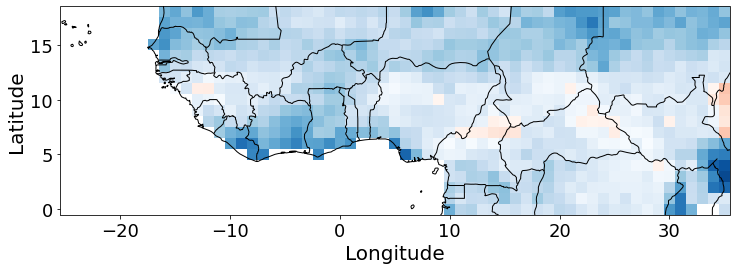

In [16]:
lat = np.arange(19)
lon = np.arange(-25, 35.5, 1)
#lons, lats = np.meshgrid(lons, lats)
fct = model_fct_mean
perfect = np.zeros((19, 61))
reference = model_ref_mean


map_val = (fct - reference) / (perfect - reference)
#map_val = np.where(np.isnan(map_val), 0, map_val)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Use ax.pcolormesh and specify the transform
mesh = ax.pcolormesh(lon, lat,map_val, transform=ccrs.PlateCarree(), cmap=cmap, vmax = 0.4, vmin = -0.4, shading = 'auto') 
                 
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

#cbar = fig.colorbar(cf, orientation='vertical',  fraction=0.015, pad=0.02)
#cbar.ax.tick_params(labelsize=18)
x = ax.set_xlabel('Longitude',fontsize = 20)
x = ax.set_ylabel('Latitude', fontsize = 20)
x = ax.set_xticks([-20, -10 , 0, 10, 20, 30])
x = ax.set_yticks([ 0, 5, 10, 15])
x = ax.tick_params(axis='y', labelsize=18)
x = ax.tick_params(axis='x', labelsize=18)